In [8]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print("Done")

Done


In [69]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load and Explore Data

In [70]:
# Load and Explore Data
df = pd.read_csv('SMS_SPAM_DATASET/spam.csv',delimiter=',', encoding='latin')
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [71]:
# Keep the first two features
df = df[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'text'})

# Display the first 5 elements of the dataset
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [73]:
print(repr(df.loc[0, "text"]))

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'


In [74]:
#  More Information about the dataset
print("Dataset Info:")
print(df.info())
print("\nClass Distribution:")
print(df['label'].value_counts())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None

Class Distribution:
label
ham     4825
spam     747
Name: count, dtype: int64


# Data Preprocessing

In [75]:
# Data Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Tokenize and remove stopwords
    words = text.split()
    # stop_words = set(stopwords.words('english'))
    # words = [word for word in words if word not in stop_words]
    # Stemming
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words]
    return ' '.join(words)

print("Loaded !")

Loaded !


In [76]:
#  clean the data text 
df['cleaned_text'] = df['text'].apply(preprocess_text)

df.head()

,label,text,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazi avail onli in bugi...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri in a wkli comp to win fa cup final ...
3,ham,U dun say so early hor... U c already then say...,u dun say so earli hor u c alreadi then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goe to usf he live around...


### Label encoding

In [77]:
# Convert labels to binary
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()

,label,text,cleaned_text
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri in a wkli comp to win fa cup final ...
3,0,U dun say so early hor... U c already then say...,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goe to usf he live around...


### Split the dataset into Training and testing sets

In [78]:
# Split Dataset
X = df['cleaned_text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("train:", X_train.shape), print("test:", X_test.shape)

train: (4457,)
test: (1115,)


(None, None)

# Experiment 1: Machine Learning

##  Imbalanced Data 
(keep the original samples sizes)

#### Normalisation and Features extraction
As a machine can only accept number, we need to transform text data into vectors to be able to train the model

In [79]:
# Normalisation and Feature Extraction
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("Done!")

Done!


##### Logistic Regression

In [80]:
# Model Loading and Training
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)
print("Done!")

Done!


In [82]:
# Prediction
y_pred = lr.predict(X_test_tfidf)

### Prediction metrics

In [84]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       0.99      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115


Confusion Matrix:
[[964   1]
 [ 34 116]]


##  Balanced Data

Undersample the data by reducing the number ham samples to be close to the number of spam samples

In [85]:
#  Undersampling: Limit 'ham' to 1000 samples
ham_df = df[df["label"] == 0].sample(n=1000, random_state=42)  # Select 1000 random ham samples
spam_df = df[df["label"] == 1]  # Keep all spam samples

df_balanced = pd.concat([ham_df, spam_df])  # Combine balanced ham + all spam
print("\nNew class distribution:\n", df_balanced["label"].value_counts())


New class distribution:
 label
0    1000
1     747
Name: count, dtype: int64


In [86]:
# Shuffle the data
from sklearn.utils import shuffle

# # Shuffle the dataset to mix ham and spam
df_balanced = shuffle(df_balanced, random_state=42)  # Using sklearn shuffle
print("Done!")

Done!


##### Split the new balanced data into training and testing

In [87]:
X = df_balanced["text"]  # Features (raw text)
y = df_balanced["label"]
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X, y, test_size=0.2, random_state=42)
print("Done!")

Done!


In [88]:
# X_train_bal = X_train
# y_train_bal = y_train

####  Normalisation and Features extraction

In [89]:
# Feature Extraction
tfidf2 = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf2.fit_transform(X_train_bal)
X_test_tfidf = tfidf2.transform(X_test_bal)

print("Done!")

Done!


In [90]:
X_train_tfidf.data

array([0.17645544, 0.15856646, 0.15045222, ..., 0.29300874, 0.29457602,
       0.46465022])

In [91]:
# Model Training
lr_bal = LogisticRegression(max_iter=1000)
lr_bal.fit(X_train_tfidf, y_train_bal)
print("Done!")

Done!


In [92]:
#  Prediction
y_pred_bal = lr_bal.predict(X_test_tfidf)
print("Done!")

Done!


##### Prediction metrics

In [93]:
print("\nClassification Report:")
print(classification_report(y_test_bal, y_pred_bal))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_bal, y_pred_bal))



Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       206
           1       0.98      0.89      0.93       144

    accuracy                           0.95       350
   macro avg       0.96      0.94      0.95       350
weighted avg       0.95      0.95      0.95       350


Confusion Matrix:
[[204   2]
 [ 16 128]]


# Spam sms classification using Deep Learning 

## Tokenization and data input preparation

In [94]:
# Tokenization
max_words = 5000
max_len = 200
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

print("Done!")

Done!


In [95]:
X_train.shape

(4457,)

In [96]:
# Sequence the data
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
print("Done!")

Done!


In [97]:
#  Prepare the input 
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)
print("Done!")

Done!


###  Deep Learning with Imbalanced Data

##### Deep Learning Model building

In [98]:
print("\n=== Deep Learning model ===")
dl_model = Sequential()
dl_model.add(Embedding(max_words, 128, input_length=max_len, trainable=True))
dl_model.add(SpatialDropout1D(0.4))
dl_model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
dl_model.add(Dense(1, activation='sigmoid'))

dl_model.summary()
print("Done!")


=== Deep Learning model ===


C:\Users\Administrator\Desktop\Conference speak\KU\myvenv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_2                  │ ?                           │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Done!


In [99]:
#  Compile the model
dl_model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])


print("Done!")

Done!


In [100]:
#  Model training
history = dl_model.fit(X_train_pad, y_train,
                      epochs=5,
                      batch_size=32,
                      validation_split=0.2)

Epoch 1/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 17s 108ms/step - accuracy: 0.8852 - loss: 0.3526 - val_accuracy: 0.9753 - val_loss: 0.0808
Epoch 2/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.9874 - loss: 0.0528 - val_accuracy: 0.9843 - val_loss: 0.0536
Epoch 3/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step - accuracy: 0.9896 - loss: 0.0348 - val_accuracy: 0.9854 - val_loss: 0.0576
Epoch 4/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step - accuracy: 0.9966 - loss: 0.0151 - val_accuracy: 0.9865 - val_loss: 0.0615
Epoch 5/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step - accuracy: 0.9976 - loss: 0.0097 - val_accuracy: 0.9865 - val_loss: 0.0600


##### Evaluation

In [101]:
dl_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 200, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_2                  │ (None, 200, 128)            │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,068,421 (7.89 MB)

 Trainable params: 689,473 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,378,948 (5.26 MB)

In [102]:
#  Prediction
y_pred_dl = (dl_model.predict(X_test_pad) > 0.5).astype(int)
print("Done!")

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step  
Done!


In [103]:
#  METRICS

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dl))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dl))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.97      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.98      0.98      0.98      1115


Confusion Matrix:
[[960   5]
 [ 12 138]]


## Deep Learning with Balanced Data

Now we will test when the data is balanced 


In [104]:
print("\n=== Deep Learning model ===")
dl_model = Sequential()
dl_model.add(Embedding(max_words, 128, input_length=max_len, trainable=True))
dl_model.add(SpatialDropout1D(0.4))
dl_model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
dl_model.add(Dense(1, activation='sigmoid'))

print("Done!")


=== Deep Learning model ===
Done!


C:\Users\Administrator\Desktop\Conference speak\KU\myvenv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [105]:
print("training set: ", X_train_bal.shape), print("testing set: ", X_test_bal.shape)

training set:  (1397,)
testing set:  (350,)


(None, None)

In [106]:
# Tokenization
max_words = 5000
max_len = 200
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train_bal)

print("Done!")

Done!


In [107]:
# Sequence the data
X_train_seq = tokenizer.texts_to_sequences(X_train_bal)
X_test_seq = tokenizer.texts_to_sequences(X_test_bal)
print("Done!")

Done!


In [108]:
#  Prepare the input 
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)
print("Done!")

Done!


In [109]:
#  Compile the model
dl_model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])


print("Done!")

Done!


In [110]:
#  Model training
history_bal = dl_model.fit(X_train_pad, y_train_bal,
                      epochs=5,
                      batch_size=32,
                      validation_split=0.2)

Epoch 1/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.6543 - loss: 0.5966 - val_accuracy: 0.8714 - val_loss: 0.4215
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.8978 - loss: 0.2887 - val_accuracy: 0.9464 - val_loss: 0.1595
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.9714 - loss: 0.1011 - val_accuracy: 0.9643 - val_loss: 0.1134
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.9891 - loss: 0.0453 - val_accuracy: 0.9679 - val_loss: 0.1257
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.9915 - loss: 0.0389 - val_accuracy: 0.9679 - val_loss: 0.1055


##### Evaluation

In [111]:
#  Prediction
y_pred_dl_bal = (dl_model.predict(X_test_pad) > 0.5).astype(int)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step 


In [112]:
#  METRICS
print("\nClassification Report:")
print(classification_report(y_test_bal, y_pred_dl_bal))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_bal, y_pred_dl_bal))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       206
           1       1.00      0.88      0.93       144

    accuracy                           0.95       350
   macro avg       0.96      0.94      0.95       350
weighted avg       0.95      0.95      0.95       350


Confusion Matrix:
[[206   0]
 [ 18 126]]


##  Comparison Between ML and DL 

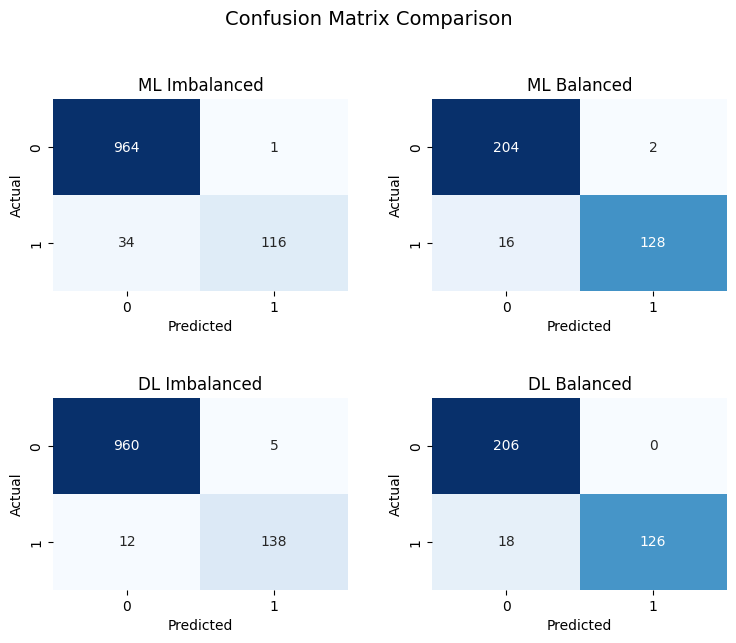

In [113]:
# Visualization with Subplots
def plot_confusion_matrix(cm, title, ax):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, 
                annot_kws={'fontsize': 10}, cbar=False)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('Predicted', fontsize=10)
    ax.set_ylabel('Actual', fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=10)

# Create figure and axes
plt.figure(figsize=(8, 7))
plt.suptitle("Confusion Matrix Comparison", y=0.95, fontsize=14)

# Create subplots in 2x2 grid
axes = []
for i in range(4):
    axes.append(plt.subplot(2, 2, i+1))

# Plot matrices
plot_confusion_matrix(confusion_matrix(y_test, y_pred), "ML Imbalanced", axes[0])
plot_confusion_matrix(confusion_matrix(y_test_bal, y_pred_bal), "ML Balanced", axes[1])
plot_confusion_matrix(confusion_matrix(y_test, y_pred_dl), "DL Imbalanced", axes[2])
plot_confusion_matrix(confusion_matrix(y_test_bal, y_pred_dl_bal), "DL Balanced", axes[3])

plt.tight_layout(pad=3.0)
plt.show()

# Saving Models & Assets

## Save Machine Learning models and vectorizer

In [13]:
#  Import dependencies
import joblib
from tensorflow.keras.models import save_model
import pickle
print("Imported!")

Imported!


In [117]:
# Save ML models and vectorizer
joblib.dump(lr, 'logreg_imbalanced.pkl')
joblib.dump(lr_bal, 'logreg_balanced.pkl')

# Save the vector params for imbalanced data
with open("tfidf_vectorizer.pkl", "wb") as file:
    pickle.dump(tfidf, file)


#  Save the vector data for balanced data
with open("tfidf2_vectorizer.pkl", "wb") as file:
    pickle.dump(tfidf2, file)


print("Done!")

Done!


## Save Deep Learning models and tokenizer

In [118]:
dl_model.save('dl_model.h5')  # Saves both architecture and weights
with open('tokenizer.pkl', 'wb') as handle:
    joblib.dump(tokenizer, handle)

# Save config values
np.save('dl_config.npy', [max_words, max_len])
print("Done!")

Done!



# Loading Models & Assets


In [119]:
# Import dependencies
from tensorflow.keras.models import load_model

## Load Models

In [120]:
import pickle

# Load ML components
lr_loaded = joblib.load('logreg_imbalanced.pkl')
lr_bal_loaded = joblib.load('logreg_balanced.pkl')
# Load the trained TF-IDF vectorizer for imbalanced data
with open("tfidf_vectorizer.pkl", "rb") as file:
    tfidf_loaded = pickle.load(file)

# Load the trained TF-IDF vectorizer for balanced data
with open("tfidf2_vectorizer.pkl", "rb") as file:
    tfidf2_loaded = pickle.load(file)
    
print("ML models Loaded!")

ML models Loaded!


In [121]:
# Load DL components
dl_model_loaded = load_model('dl_model.h5')
tokenizer_loaded = joblib.load('tokenizer.pkl')
max_words_loaded, max_len_loaded = np.load('dl_config.npy', allow_pickle=True)

print("DL models Loaded!")

DL models Loaded!



## New Predictions using the saved models


 Prediction Function

In [122]:
def predict_spam(sms):
    # Preprocess input
    cleaned_text = preprocess_text(sms)  # Clean the text

    # Use pre-trained TF-IDF vectorizer for imbalanced data
    ml_vector = tfidf_loaded.transform([cleaned_text])  # Transform input, don't fit again! tfidf2_loaded 

    # Use pre-trained TF-IDF vectorizer for balanced data
    ml_vector2 = tfidf2_loaded.transform([cleaned_text])  # Transform input, don't fit again! 

    #  ML prediction
    ml_pred = lr_loaded.predict(ml_vector)[0]  # Imbalanced model
    ml_bal_pred = lr_bal_loaded.predict(ml_vector2)[0]  # Balanced model

    #  DL prediction: Use tokenizer on raw SMS, not processed text
    dl_sequence = tokenizer_loaded.texts_to_sequences([sms])  
    dl_padded = pad_sequences(dl_sequence, maxlen=max_len_loaded)  
    dl_pred = (dl_model_loaded.predict(dl_padded) > 0.5).astype(int)[0][0]

    return {
        'ML Imbalanced': 'SPAM' if ml_pred == 1 else 'HAM',
        'ML Balanced': 'SPAM' if ml_bal_pred == 1 else 'HAM',
        'DL Model': 'SPAM' if dl_pred == 1 else 'HAM'
    }

print("Done!")


Done!


## NEW PREDICTIONS

For this test we will use some sms text not in the dataset and observe the prediction results.

In [123]:
# Test
test_sms = "Congratulations! You've won a $1000 prize! click the link to claim. "
results = predict_spam(test_sms)

print("Prediction Results for Test SMS:")
print("=================================")
print(f"Original SMS: {test_sms}")
print("\nModel Predictions:")
for model, prediction in results.items():
    print(f"{model}: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
Prediction Results for Test SMS:
Original SMS: Congratulations! You've won a $1000 prize! click the link to claim. 

Model Predictions:
ML Imbalanced: SPAM
ML Balanced: SPAM
DL Model: SPAM


In [126]:
# Test
# test_sms = "Hello my friend how have you been ? can you call me this evening please ?"
# test_sms = "send $1000 to this acount number. "
test_sms = "send your banque account details to this link by clicking here"
results = predict_spam(test_sms)

print("Prediction Results for Test SMS:")
print("=================================")
print(f"Original SMS: {test_sms}")
print("\nModel Predictions:")
for model, prediction in results.items():
    print(f"{model}: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Prediction Results for Test SMS:
Original SMS: send your banque account details to this link by clicking here

Model Predictions:
ML Imbalanced: HAM
ML Balanced: SPAM
DL Model: HAM


# =============
### END 
Dr. MAIGA
# =============